In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
import glob
from datetime import datetime,timedelta
import re

import warnings
warnings.filterwarnings('ignore')

In [81]:
plt.rcParams['font.family']=['NanumGothic', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

In [82]:
files = glob.glob('G:\내 드라이브\Colab Notebooks\데이터분석\.data\공공데이터포털\교육부 국사편찬위원회_한국역사자료 메타데이터 정보_인물\*')
files

['G:\\내 드라이브\\Colab Notebooks\\데이터분석\\.data\\공공데이터포털\\교육부 국사편찬위원회_한국역사자료 메타데이터 정보_인물\\교육부 국사편찬위원회_한국역사자료 메타데이터 정보_인물.csv',
 'G:\\내 드라이브\\Colab Notebooks\\데이터분석\\.data\\공공데이터포털\\교육부 국사편찬위원회_한국역사자료 메타데이터 정보_인물\\교육부 국사편찬위원회_한국역사자료 메타데이터 정보_인물_컬럼정의서.xlsx']

In [83]:
meta_df = pd.read_excel(files[1],sheet_name=[0])
df = pd.read_csv(files[0],encoding='utf-8')
df.head()

,통합메타데이터 ID,전문센터ID,역통 대분류,DB정보,전문센터 메타데이터,제목,대체제목,원자료의 발신자,원자료의 편찬자,원자료의 작성자,...,사건발생일,원자료생성일,원자료발행일,발행일,생성일,갱신일,연계주소,저자정렬,날짜정렬,Unnamed: 31
0,KH.AKS_PPL.EXM_KM_5COa_0958_000001,AKS_PPL,KH.09.08.000,한국역대과거합격자,EXM_KM_5COa_0958_000001,최섬(崔暹),고려문과|광종(光宗) 9년 무오방(戊午榜),NaN,NaN,NaN,...,958,미상,NaN,1900-01-01 00:00:00,1900-01-01 00:00:00,2016-01-22 00:00:00,<url><get>http://people.aks.ac.kr/front/dirSer...,,958,NaN
1,KH.AKS_PPL.EXM_KM_5COa_0958_000002,AKS_PPL,KH.09.08.000,한국역대과거합격자,EXM_KM_5COa_0958_000002,조욱(趙昱),고려문과|광종(光宗) 9년 무오방(戊午榜),NaN,NaN,NaN,...,958,미상,NaN,1900-01-01 00:00:00,1900-01-01 00:00:00,2016-01-22 00:00:00,<url><get>http://people.aks.ac.kr/front/dirSer...,,958,NaN
2,KH.AKS_PPL.EXM_KM_5COa_0958_000003,AKS_PPL,KH.09.08.000,한국역대과거합격자,EXM_KM_5COa_0958_000003,진긍(晉兢),고려문과|광종(光宗) 9년 무오방(戊午榜),NaN,NaN,NaN,...,958,미상,NaN,1900-01-01 00:00:00,1900-01-01 00:00:00,2016-01-22 00:00:00,<url><get>http://people.aks.ac.kr/front/dirSer...,,958,NaN
3,KH.AKS_PPL.EXM_KM_5COa_0960_000003,AKS_PPL,KH.09.08.000,한국역대과거합격자,EXM_KM_5COa_0960_000003,최광범(崔光範),고려문과|광종(光宗) 11년 경신방(庚申榜),NaN,NaN,NaN,...,960,미상,NaN,1900-01-01 00:00:00,1900-01-01 00:00:00,2016-01-22 00:00:00,<url><get>http://people.aks.ac.kr/front/dirSer...,,960,NaN
4,KH.AKS_PPL.EXM_KM_5COa_0960_000004,AKS_PPL,KH.09.08.000,한국역대과거합격자,EXM_KM_5COa_0960_000004,서희(徐熙)|광윤(光允) 장위(章威),고려문과|광종(光宗) 11년 경신방(庚申榜),NaN,NaN,NaN,...,960,943,NaN,1900-01-01 00:00:00,1900-01-01 00:00:00,2016-01-22 00:00:00,<url><get>http://people.aks.ac.kr/front/dirSer...,,960,NaN


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193202 entries, 0 to 193201
Data columns (total 32 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   통합메타데이터 ID   193202 non-null  object 
 1   전문센터ID       193202 non-null  object 
 2   역통 대분류       193202 non-null  object 
 3   DB정보         193202 non-null  object 
 4   전문센터 메타데이터   193202 non-null  object 
 5   제목           193202 non-null  object 
 6   대체제목         122795 non-null  object 
 7   원자료의 발신자     0 non-null       float64
 8   원자료의 편찬자     0 non-null       float64
 9   원자료의 작성자     36 non-null      object 
 10  역통 중분류       193202 non-null  object 
 11  역통 소분류       193202 non-null  object 
 12  전문센터주제분류     193202 non-null  object 
 13  자료유형         0 non-null       float64
 14  기사레벨         193202 non-null  int64  
 15  발행자          15053 non-null   object 
 16  파일형식         193202 non-null  object 
 17  목차           0 non-null       float64
 18  초록           190482 non-

In [11]:
df.describe()

,원자료의 발신자,원자료의 편찬자,자료유형,기사레벨,목차,상위자료아이디,상위자료,의존자료,Unnamed: 31
count,0.0,0.0,0.0,193202.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN


In [12]:
df.describe(include=np.object)

,통합메타데이터 ID,전문센터ID,역통 대분류,DB정보,전문센터 메타데이터,제목,대체제목,원자료의 작성자,역통 중분류,역통 소분류,...,초록,사건발생일,원자료생성일,원자료발행일,발행일,생성일,갱신일,연계주소,저자정렬,날짜정렬
count,193202,193202,193202,193202,193202,193202,122795,36,193202,193202,...,190482,158581,114499,15052,193202,193202,193202,193202,127936,179522
unique,193202,5,7,7,193202,166253,18670,33,1,7,...,182654,25320,4398,48,82,10,7,193202,34,29026
top,KH.AKS_PPL.EXM_KM_5COa_0958_000001,AKS_PPL,KH.09.08.000,한국역대과거합격자,EXM_KM_5COa_0958_000001,■■■(■■■),무과|인조(仁祖) 15년 별시(別試),김현숙,KH.09,KH.09.08,...,"본적:未詳 , 주소:미상",9999-99-99,미상,1990-99-99,1900-01-01 00:00:00,1900-01-01 00:00:00,2016-01-22 00:00:00,<url><get>http://people.aks.ac.kr/front/dirSer...,,9999-99-99
freq,1,122280,106551,106551,1,95,5506,3,193202,106551,...,327,5595,13325,3615,127899,127936,106551,1,127900,5603


In [13]:
df.isnull().sum()

통합메타데이터 ID          0
전문센터ID              0
역통 대분류              0
DB정보                0
전문센터 메타데이터          0
제목                  0
대체제목            70407
원자료의 발신자       193202
원자료의 편찬자       193202
원자료의 작성자       193166
역통 중분류              0
역통 소분류              0
전문센터주제분류            0
자료유형           193202
기사레벨                0
발행자            178149
파일형식                0
목차             193202
초록               2720
상위자료아이디        193202
상위자료           193202
의존자료           193202
사건발생일           34621
원자료생성일          78703
원자료발행일         178150
발행일                 0
생성일                 0
갱신일                 0
연계주소                0
저자정렬            65266
날짜정렬            13680
Unnamed: 31    193202
dtype: int64

## 전처리

In [85]:
df = df.drop(['원자료의 발신자','원자료의 편찬자','자료유형','기사레벨','목차','상위자료아이디','상위자료','의존자료','Unnamed: 31',
'통합메타데이터 ID','역통 대분류','역통 중분류','초록','파일형식','사건발생일','연계주소'],axis=1)

In [86]:
df.fillna('미상',inplace=True)

In [88]:
df['날짜정렬'] = df['날짜정렬'].apply(lambda x:re.findall(r'([BC]*[0-9]*)',x)[0])

In [90]:
def date_convert(x):
    if x=='':
        return -1
    elif 'BC' in x:
        return 0
    else:
        return int(x)
df['날짜정렬'] = df['날짜정렬'].apply(date_convert)

In [97]:
def to_year_month(x):
    dat = datetime.strptime(x,'%Y-%m-%d %H:%M:%S')
    return str(dat.year) + '-' + str(dat.month).zfill(2)
df['발행일'] = df['발행일'].apply(to_year_month)
df['생성일'] = df['생성일'].apply(to_year_month)
df['갱신일'] = df['갱신일'].apply(to_year_month)

In [98]:
df.head()

,전문센터ID,DB정보,전문센터 메타데이터,제목,대체제목,원자료의 작성자,역통 소분류,전문센터주제분류,발행자,원자료생성일,원자료발행일,발행일,생성일,갱신일,저자정렬,날짜정렬
0,AKS_PPL,한국역대과거합격자,EXM_KM_5COa_0958_000001,최섬(崔暹),고려문과|광종(光宗) 9년 무오방(戊午榜),미상,KH.09.08,exm_ppl,미상,미상,미상,1900-01,1900-01,2016-01,,958
1,AKS_PPL,한국역대과거합격자,EXM_KM_5COa_0958_000002,조욱(趙昱),고려문과|광종(光宗) 9년 무오방(戊午榜),미상,KH.09.08,exm_ppl,미상,미상,미상,1900-01,1900-01,2016-01,,958
2,AKS_PPL,한국역대과거합격자,EXM_KM_5COa_0958_000003,진긍(晉兢),고려문과|광종(光宗) 9년 무오방(戊午榜),미상,KH.09.08,exm_ppl,미상,미상,미상,1900-01,1900-01,2016-01,,958
3,AKS_PPL,한국역대과거합격자,EXM_KM_5COa_0960_000003,최광범(崔光範),고려문과|광종(光宗) 11년 경신방(庚申榜),미상,KH.09.08,exm_ppl,미상,미상,미상,1900-01,1900-01,2016-01,,960
4,AKS_PPL,한국역대과거합격자,EXM_KM_5COa_0960_000004,서희(徐熙)|광윤(光允) 장위(章威),고려문과|광종(光宗) 11년 경신방(庚申榜),미상,KH.09.08,exm_ppl,미상,943,미상,1900-01,1900-01,2016-01,,960


## 시각화

In [106]:
df['원자료의 작성자'].unique()

array(['미상', '김현숙', '유하영', '정병상', '허동현', '박광석', '우성민', '김은숙', '이혜은',
       '김기섭', '김종식', '연민수', '손승철', '배경한', '한명기', '반병률', '오병수', '임상선',
       '김은국', '윤재운', '이종욱', '장세윤', '김상기', '박원길', '김택민', '홍성덕', '이명화',
       '임상범', '신병주', '이준갑', '곽진오', '김민규', '조규태', '이병진'], dtype=object)

In [ ]:
DB정보,원자료의 작성자,발행자,역통 소분류

[Text(0.5, 1.0, 'DB정보 분포'), Text(0, 0.5, 'count')]

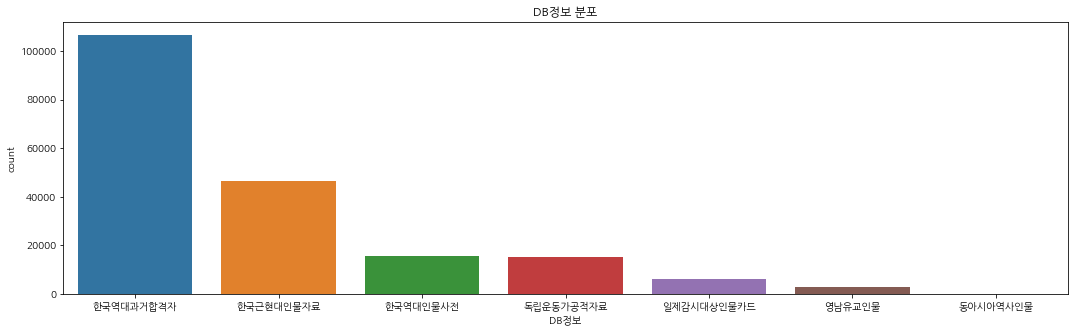

In [108]:
sub_df = df.groupby('DB정보',as_index=False)['제목'].count().sort_values('제목',ascending=False)
plt.figure(figsize=(18,5))
sns.barplot(data=sub_df,x='DB정보',y='제목').set(title='DB정보 분포',ylabel='count')

[Text(0.5, 1.0, '원자료의 작성자 분포'), Text(0, 0.5, 'count')]

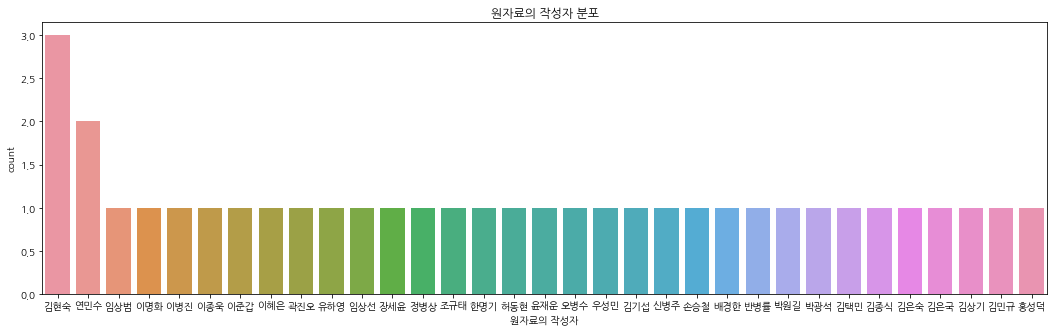

In [110]:
sub_df = df[df['원자료의 작성자']!='미상'].groupby('원자료의 작성자',as_index=False)['제목'].count().sort_values('제목',ascending=False)
plt.figure(figsize=(18,5))
sns.barplot(data=sub_df,x='원자료의 작성자',y='제목').set(title='원자료의 작성자 분포',ylabel='count')

<AxesSubplot: ylabel='제목'>

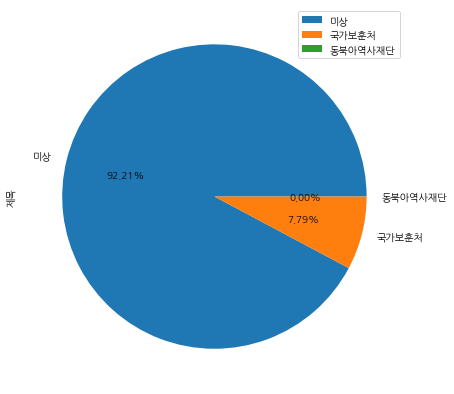

In [129]:
sub_df = df.groupby('발행자',as_index=False)['제목'].count().sort_values('제목',ascending=False)
fig,ax = plt.subplots(1,1,figsize=(7,7))
sub_df.plot.pie(y='제목',labels=sub_df['발행자'].unique(),ax=ax,autopct='%.2f%%')

[Text(0.5, 1.0, '역통 소분류 분포'), Text(0, 0.5, 'count')]

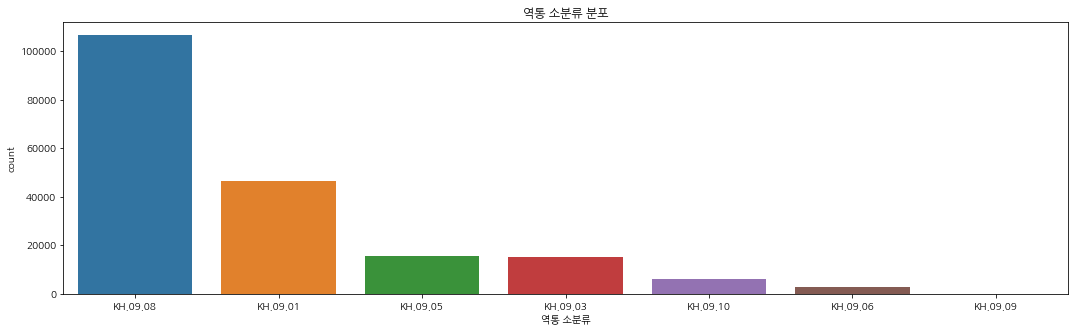

In [113]:
sub_df = df[df['역통 소분류']!='미상'].groupby('역통 소분류',as_index=False)['제목'].count().sort_values('제목',ascending=False)
plt.figure(figsize=(18,5))
sns.barplot(data=sub_df,x='역통 소분류',y='제목').set(title='역통 소분류 분포',ylabel='count')

[Text(0.5, 1.0, '날짜 분포')]

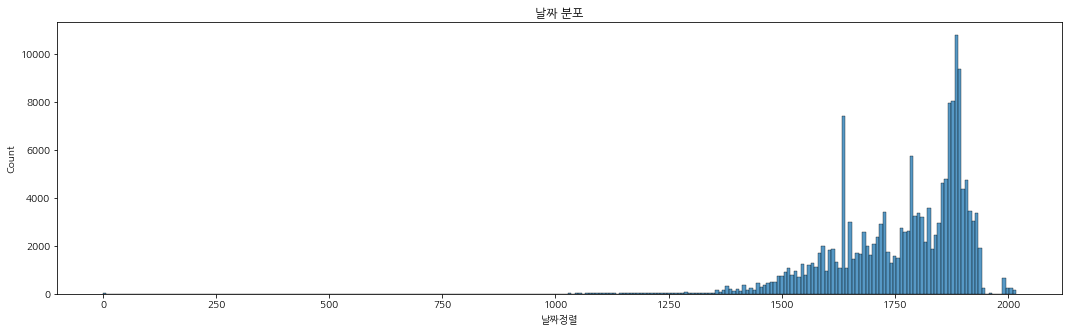

In [130]:
plt.figure(figsize=(18,5))
sns.histplot(data=df[(df['날짜정렬']>-1)&(df['날짜정렬']<2023)],x='날짜정렬').set(title='날짜 분포')

[Text(0.5, 1.0, '발행일 분포'), Text(0, 0.5, 'count')]

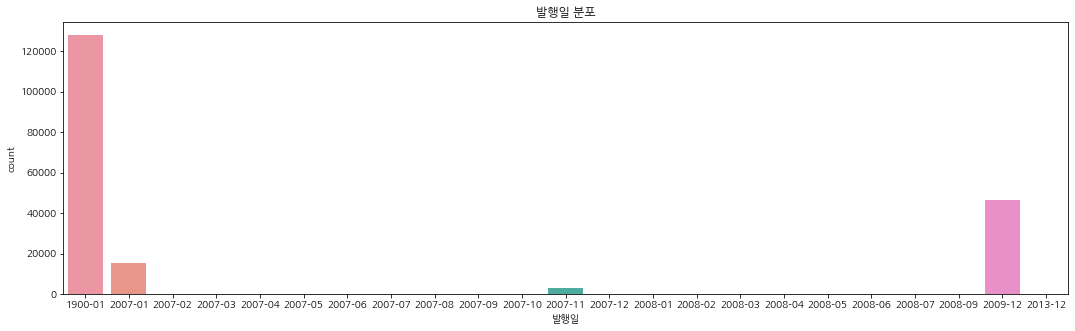

In [121]:
sub_df = df.groupby('발행일',as_index=False)['제목'].count().sort_values('발행일')
plt.figure(figsize=(18,5))
sns.barplot(data=sub_df,x='발행일',y='제목').set(title='발행일 분포',ylabel='count')

[Text(0.5, 1.0, '생성일 분포'), Text(0, 0.5, 'count')]

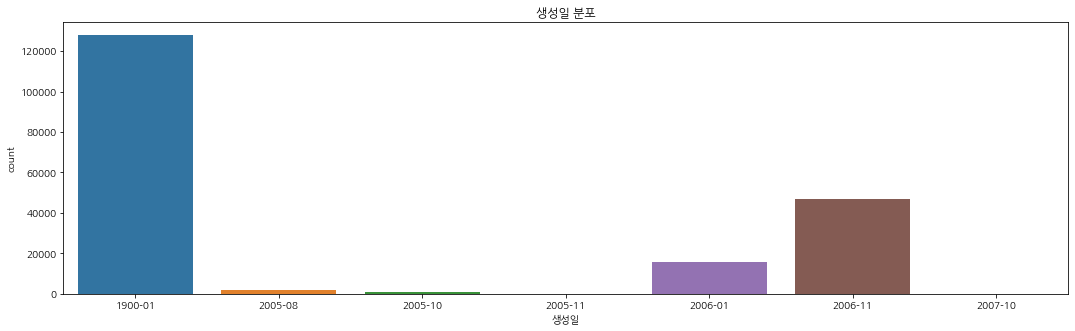

In [120]:
sub_df = df.groupby('생성일',as_index=False)['제목'].count().sort_values('생성일')
plt.figure(figsize=(18,5))
sns.barplot(data=sub_df,x='생성일',y='제목').set(title='생성일 분포',ylabel='count')

[Text(0.5, 1.0, '갱신일 분포'), Text(0, 0.5, 'count')]

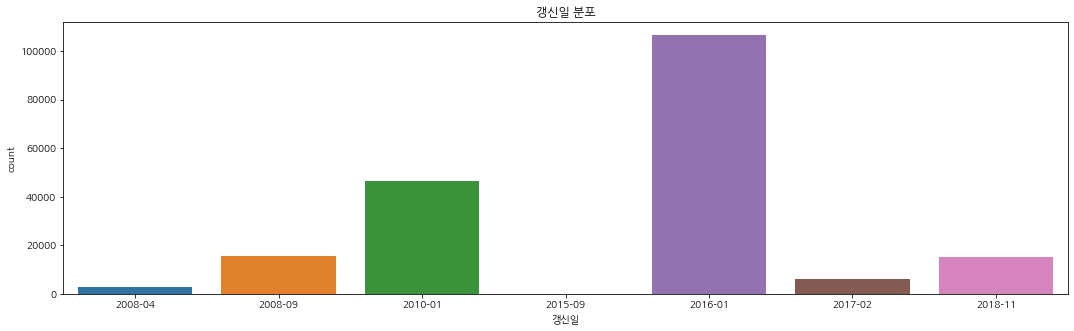

In [122]:
sub_df = df.groupby('갱신일',as_index=False)['제목'].count().sort_values('갱신일')
plt.figure(figsize=(18,5))
sns.barplot(data=sub_df,x='갱신일',y='제목').set(title='갱신일 분포',ylabel='count')